参考：https://tf.wiki/zh_hans/basic/basic.html

In [91]:
import tensorflow as tf  # 在tf2中，即时执行模式为默认方式
tf.__version__

'2.2.0'

In [98]:
# 检查gpu 设备是否可用
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

# TF 中数据类型
1.数值型
2.字符串型
3.布尔型

## 数值型--张量
在tf 中使用 张量 作为数据的基本单位
张量的重要属性是 形状、类型 和值
- 标量（scalar）,shape[]
- 向量（vector）, shape[n]
- matrix，shaoe[m,n]
- dim>2,统称为张量，张量的每个维度也叫 axis


### 张量创建

In [106]:
# 定义随机数，标量
random_float= tf.random.uniform(shape=())
b = tf.constant(1.2)
c= 1.1   # 要使用TF 中规定的方式创建张量
random_float, b, c, b-c

(<tf.Tensor: shape=(), dtype=float32, numpy=0.55073714>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.2>,
 1.1,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.100000024>)

In [34]:
# 定义有2个元素的零向量
zero_vector = tf.zeros(shape=(2))
zero_vector

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [190]:
tf.Variable(tf.zeros([3]))

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [32]:
# 定义两个 2x2 的常量矩阵
A= tf.constant([[1.,2.], [3.,4.]])
B= tf.constant([[5.,6.], [7.,8.]])
A,B

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 2.],
        [3., 4.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[5., 6.],
        [7., 8.]], dtype=float32)>)

In [127]:
# 自定义shape
input_shape = (1,3,3,4)
tf.ones(input_shape)

<tf.Tensor: shape=(1, 3, 3, 4), dtype=float32, numpy=
array([[[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]], dtype=float32)>

In [128]:
# 也可以通过 转换创建
import numpy as np
a =np.array([[1,2],
         [3,4]])
tf.convert_to_tensor(a)

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[1, 2],
       [3, 4]])>

In [138]:
# 创建序列
tf.range(10, delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8], dtype=int32)>

创建已知分布的张量
- 正态分布
- 均匀分布

In [131]:
a = tf.random.normal([2,2])
b = tf.random.normal([2,2], mean=1,stddev=2)  # 创建均值为1，标准差为2
print(a,b,sep='\n')

tf.Tensor(
[[ 0.51667637  0.16837546]
 [-1.8274075  -0.33144206]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-2.326231    0.19490719]
 [ 1.187911    1.244755  ]], shape=(2, 2), dtype=float32)


In [136]:
a = tf.random.uniform([2,3])  # 采样区间为【0,1】
b= tf.random.uniform([2,3], maxval=100, dtype=tf.int32)  # 采样整形类型数据，同时指定数据类型（精度）
print(a,b,sep='\n')

tf.Tensor(
[[0.26679206 0.05870211 0.49058473]
 [0.18870091 0.3946991  0.14748538]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[38 71 11]
 [41 76 49]], shape=(2, 3), dtype=int32)


In [33]:
# 张量的重要属性是 形状、类型 和值
# 查看：
print(A.shape, A.dtype, A.numpy())

(2, 2) <dtype: 'float32'> [[1. 2.]
 [3. 4.]]


In [36]:
# 张量操作
c= tf.add(A,B)  # 计算矩阵和
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 6.,  8.],
       [10., 12.]], dtype=float32)>

In [37]:
# 计算矩阵相乘
D = tf.matmul(A,B)
D

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[19., 22.],
       [43., 50.]], dtype=float32)>

### 多维张量的几何解释
https://cloud.tencent.com/developer/article/1547356

注意，通道的表示

In [84]:
#三维张量，3行4列深度为2的张量
const3 = tf.constant([
                     [[ 1,  2], [ 3,  4], [ 5,  6], [ 7,  8]],
                     [[11, 12], [13, 14], [15, 16], [17, 18]],
                     [[21, 22], [23, 24], [25, 26], [27, 28]]
                     ], tf.float16)
const3

<tf.Tensor: shape=(3, 4, 2), dtype=float16, numpy=
array([[[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.]],

       [[11., 12.],
        [13., 14.],
        [15., 16.],
        [17., 18.]],

       [[21., 22.],
        [23., 24.],
        [25., 26.],
        [27., 28.]]], dtype=float16)>


对应的如下数据：
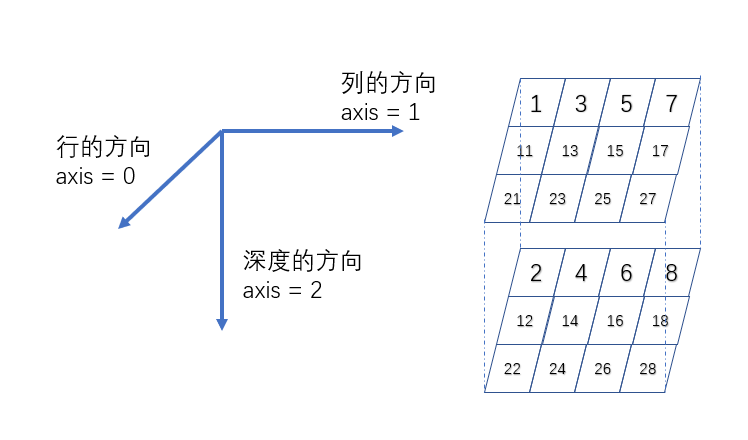



### 精度

In [121]:
# 创建张量时，可以指定张量的保存精度
a= tf.constant(123456789, dtype=tf.int16)  # 溢出
b =tf.constant(123456789, dtype=tf.int32)
a,b
# 一般使用 tf.int32, tf.int64

(<tf.Tensor: shape=(), dtype=int16, numpy=-13035>,
 <tf.Tensor: shape=(), dtype=int32, numpy=123456789>)

In [123]:
# 浮点数
import numpy as np
np.pi

3.141592653589793

In [124]:
tf.constant(np.pi, dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

In [126]:
# 指定更高精度：
tf.constant(np.pi, dtype=tf.float64)

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

## 字符串类型

In [111]:
a = tf.constant('Hello , Deep learning')
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello , Deep learning'>

In [112]:
tf.strings.lower(a)

<tf.Tensor: shape=(), dtype=string, numpy=b'hello , deep learning'>

## 布尔类型

In [117]:
a=tf.constant(True)
a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## 维度变换
- reshape, 增删维度不会影响张量的存储
- transpose 交换维度，改变了张量的存储顺序，同时也改变了张量的视图

### 1). reshpae

In [144]:
x = tf.range(96)
x

<tf.Tensor: shape=(96,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int32)>

In [149]:
"""
变换后的理解：
2个样本，4*4的彩色照片---->3通道
"""
y=tf.reshape(x, [2,4,4,3])
print(y.ndim, y.shape)  #查看张量维度、形状
y

4 (2, 4, 4, 3)


<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]], dtype=int32)>

In [155]:
print(tf.reshape(x, [2,-1]))
tf.reshape(x, [2,4,12])

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
  72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]], shape=(2, 48), dtype=int32)


<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]], dtype=int32)>

### 2) 增删维度

In [185]:
x =tf.random.uniform([2,2], maxval=10, dtype=tf.int32)
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6, 8],
       [5, 2]], dtype=int32)>

In [186]:
tf.expand_dims(x, axis=2)

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[6],
        [8]],

       [[5],
        [2]]], dtype=int32)>

In [187]:
tf.expand_dims(x,axis=0) # shape=(1, 2, 2)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[6, 8],
        [5, 2]]], dtype=int32)>

In [188]:
# 删除维度
x= tf.random.uniform([1,4,4,1])
tf.squeeze(x, axis=0)

<tf.Tensor: shape=(4, 4, 1), dtype=float32, numpy=
array([[[0.36934495],
        [0.8086957 ],
        [0.27312374],
        [0.50928116]],

       [[0.5360769 ],
        [0.7336986 ],
        [0.7175299 ],
        [0.88423014]],

       [[0.42005587],
        [0.92795396],
        [0.52024174],
        [0.62639725]],

       [[0.42563355],
        [0.88048077],
        [0.8071213 ],
        [0.1979754 ]]], dtype=float32)>

### 3) 交换维度 Transpose

In [189]:
x= tf.random.normal([2,3,3,1])
print(x)
tf.transpose(x,perm=[0,3,1,2])

tf.Tensor(
[[[[-1.1855215 ]
   [-0.76488453]
   [-0.59369946]]

  [[-0.416811  ]
   [ 0.10235399]
   [ 0.7415841 ]]

  [[-0.16267891]
   [ 0.71344566]
   [-0.40588287]]]


 [[[-0.5581484 ]
   [-0.57614285]
   [ 0.5973474 ]]

  [[-0.03363952]
   [ 0.7066523 ]
   [-1.5348479 ]]

  [[-0.2817344 ]
   [-0.42164877]
   [ 0.01449816]]]], shape=(2, 3, 3, 1), dtype=float32)


<tf.Tensor: shape=(2, 1, 3, 3), dtype=float32, numpy=
array([[[[-1.1855215 , -0.76488453, -0.59369946],
         [-0.416811  ,  0.10235399,  0.7415841 ],
         [-0.16267891,  0.71344566, -0.40588287]]],


       [[[-0.5581484 , -0.57614285,  0.5973474 ],
         [-0.03363952,  0.7066523 , -1.5348479 ],
         [-0.2817344 , -0.42164877,  0.01449816]]]], dtype=float32)>

## 合并与分割


In [198]:
a = tf.random.normal([4,35,8])
b = tf.random.normal([6,35,8])
x1 = tf.concat([a,b],axis=0)
x1.shape

TensorShape([10, 35, 8])

In [201]:
a = tf.random.normal([4,35,8])
b = tf.random.normal([4,35,8])
x1 = tf.concat([a,b],axis=2)
x1.shape

TensorShape([4, 35, 16])

In [203]:
"""
tf.stack()
会创建新的维度
"""
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
x1 = tf.stack([a,b],axis=0)
x1.shape

TensorShape([2, 35, 8])

In [206]:
"""
分割
"""
x= tf.random.normal([10,3,4])
res = tf.split(x,axis=0, num_or_size_splits=10)
res[0]

<tf.Tensor: shape=(1, 3, 4), dtype=float32, numpy=
array([[[ 0.4315047 , -1.1407601 , -1.8682294 , -1.4007369 ],
        [-1.2341512 ,  0.5665225 ,  0.2287841 ,  0.85365057],
        [ 0.44875246, -0.00930753,  0.8656226 , -1.0099585 ]]],
      dtype=float32)>

In [208]:
# 不等长切割
res = tf.split(x,axis=0, num_or_size_splits=[3,3,4])
res[0]

<tf.Tensor: shape=(3, 3, 4), dtype=float32, numpy=
array([[[ 0.4315047 , -1.1407601 , -1.8682294 , -1.4007369 ],
        [-1.2341512 ,  0.5665225 ,  0.2287841 ,  0.85365057],
        [ 0.44875246, -0.00930753,  0.8656226 , -1.0099585 ]],

       [[ 3.5826058 , -0.51693016,  1.7356758 ,  0.86005723],
        [-0.38301   ,  1.1312126 ,  2.3226976 , -0.21169822],
        [-2.313271  ,  0.26999164, -0.71693456,  0.826646  ]],

       [[ 0.2706114 ,  0.59898496,  0.26473108, -1.3708816 ],
        [ 0.37554255,  0.7973066 ,  1.0441977 , -1.0431063 ],
        [-0.11843815, -0.61460245,  0.3207984 ,  0.28195444]]],
      dtype=float32)>

## meshgrid

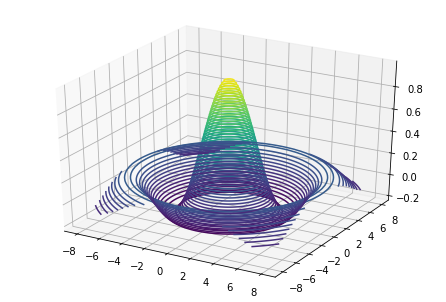

In [209]:
# 可以方便生成二维网格采样点坐标，方便可视化等应用场合
x = tf.linspace(-8.,8,100) # 设置 x 坐标的间隔
y = tf.linspace(-8.,8,100) # 设置 y 坐标的间隔
x,y = tf.meshgrid(x,y) # 生成网格点，并拆分后返回 
z =tf.sqrt(x**2+y**2)
z=tf.sin(z)/z
z

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
# 根据网格点绘制 sinc 函数 3D 曲面 
ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50)
plt.show()

# 加速计算
tf的重要功能是利用GPU 方便的实现并行计算加速功能

矩阵维度越大，GPU加速越明显
![image-20210727081451190](https://tva1.sinaimg.cn/large/008i3skNgy1gsv6y6tw7xj30vi0l00tx.jpg)

In [ ]:
import timeit
import tensorflow as tf
n = 10**7
# 创建在CPU上运算的2个矩阵
with tf.device('/cpu:0'):
    cpu_a = tf.random.normal([1, n])
    cpu_b = tf.random.normal([n, 1])
    print(cpu_a.device, cpu_b.device)

# 创建使用GPU运算的2个矩阵
with tf.device('/gpu:0'):
    gpu_a = tf.random.normal([1, n])
    gpu_b = tf.random.normal([n, 1])
    print(gpu_a.device, gpu_b.device)


def cpu_run():
    with tf.device('/cpu:0'):
        c = tf.matmul(cpu_a, cpu_b)
    return c


def gpu_run():
    with tf.device('/gpu:0'):
        c = tf.matmul(gpu_a, gpu_b)
    return c

# 第一次计算需要热身，避免将初始化阶段时间结算在内
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('warmup:', cpu_time, gpu_time)
# 正式计算10次，取平均时间
cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('run time:', cpu_time, gpu_time)

# 自动求导机制
tf.GradientTape()

In [50]:
# 计算 y(x)= x^2 在x=3时的导数
import tensorflow as tf
x=tf.Variable(initial_value=3.)  # 声明变量, 变量赋值初始化
with tf.GradientTape() as tape:
    y= tf.square(x)
y_grad = tape.gradient(y,x)
y, y_grad, x   #注意，张量与变量的区别

# 变量与普通张量的一个重要区别是其默认能够被 TensorFlow 的自动求导机制所求导，
# 因此往往被用于定义机器学习模型的参数。

(<tf.Tensor: shape=(), dtype=float32, numpy=9.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>)

In [56]:
# 对多元函数、向量、矩阵求导
# 如对 L(w, b) = |Xw + b - y|^2 
# 在 w = (1, 2)^T, b = 1 时分别对 w, b 的偏导数
X = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[1.], [2.]])
w = tf.Variable(initial_value=[[1.], [2.]])
b = tf.Variable(initial_value=1.)
with tf.GradientTape() as tape:
    L = tf.reduce_sum(tf.square(tf.matmul(X, w) + b - y))  
    # tf.reduce_sum() 操作代表对输入张量的所有元素求和，输出一个形状为空的纯量张量
#     （可以通过 axis 参数来指定求和的维度，不指定则默认对所有元素求和）
w_grad, b_grad = tape.gradient(L, [w, b])        # 计算L(w, b)关于w, b的偏导数
print(L,'\n', w_grad,'\n', b_grad)

tf.Tensor(125.0, shape=(), dtype=float32) 
 tf.Tensor(
[[ 70.]
 [100.]], shape=(2, 1), dtype=float32) 
 tf.Tensor(30.0, shape=(), dtype=float32)


![image-20210727081749196](https://tva1.sinaimg.cn/large/008i3skNgy1gsv71999roj31100fkaaw.jpg)

# 基础示例：线性回归

考虑一个实际问题，某城市在 2013 年 - 2017 年的房价如下表所示：

![image-20210727081851855](https://tva1.sinaimg.cn/large/008i3skNgy1gsv72cffjcj31a207g3z9.jpg)
现在，我们希望通过对该数据进行线性回归，即使用线性模型 y = ax + b 来拟合上述数据，此处 a 和 b 是待求的参数。

In [65]:
# 1） 定义数据，进行归一化操作
import numpy as np
X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

损失函数：l = (ax+b-y)^2

In [71]:
# 首先，使用np 手工操作
a, b= 0,0
num_epoch = 10000
learning_rate = 5e-4
for e in range(num_epoch):
    y_pred = a*X+b
    grad_a, grad_b = 2*(y_pred-y).dot(X), 2*(y_pred-y).sum()
    
#     更新参数
    a,b = a-learning_rate*grad_a, b-learning_rate*grad_b
print(a,b)

0.9763702027872223 0.057564988337455304


然而，你或许已经可以注意到，使用常规的科学计算库实现机器学习模型有两个痛点：

经常需要手工求函数关于参数的偏导数。如果是简单的函数或许还好，但一旦函数的形式变得复杂（尤其是深度学习模型），手工求导的过程将变得非常痛苦，甚至不可行。

经常需要手工根据求导的结果更新参数。这里使用了最基础的梯度下降方法，因此参数的更新还较为容易。但如果使用更加复杂的参数更新方法（例如 Adam 或者 Adagrad），这个更新过程的编写同样会非常繁杂。

## TF下的线性回归

In [81]:
X = tf.constant(X)
y = tf.constant(y)

a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a, b]

num_epoch = 10000
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)  # 声明梯度下降优化器
for e in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = tf.reduce_sum(tf.square(y_pred - y))
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自动根据梯度更新参数
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))
print(a,b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.97637> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.057565063>


# 经典数据集加载

对于常用的数据集，如:

❑ Boston Housing 波士顿房价趋势数据集，用于回归模型训练与测试 

❑ CIFAR10/100 真实图片数据集，用于图片分类任务

❑ MNIST/Fashion_MNIST 手写数字图片数据集，用于图片分类任务

❑ IMDB 情感分类任务数据集



2.2.0
x: (60000, 28, 28) y: (60000,) x test: (10000, 28, 28) y test: [7 2 1 ... 4 5 6]
(None, 28, 28) (None,)
(None, 28, 28) (None,)
train sample: (512, 784) (512, 10)
0 loss: 0.5947225093841553
0 Evaluate Acc: 0.1242
80 loss: 0.18921861052513123
80 Evaluate Acc: 0.2351
160 loss: 0.14849834144115448
160 Evaluate Acc: 0.3147


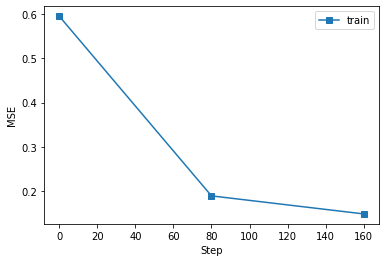

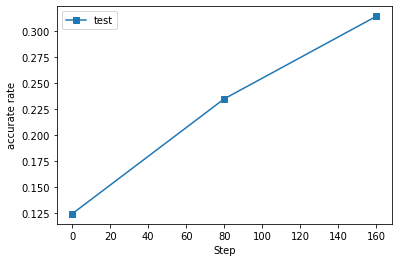

In [240]:
# %%
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(tf.__version__)


def preprocess(x, y):
    """ 调用此函数会自动传入 x,y对象，shape 为【b,28,28】

    :param x:
    :param y:
    :return:
    """
    # [b, 28, 28], [b]
    print(x.shape, y.shape)
    x = tf.cast(x, dtype=tf.float32) / 255.  # 标准化到0-1
    x = tf.reshape(x, [-1, 28 * 28])  # 打平
    y = tf.cast(y, dtype=tf.int32)  # 转成整形张量
    y = tf.one_hot(y, depth=10)   # one-hot编码

    return x, y


# %%
(x, y), (x_test, y_test) = datasets.mnist.load_data()
print('x:', x.shape, 'y:', y.shape, 'x test:', x_test.shape, 'y test:', y_test)
# %%
batchsz = 512
train_db = tf.data.Dataset.from_tensor_slices((x, y))
train_db = train_db.shuffle(1000)  # 保证每个epoch 数据都是随机的
train_db = train_db.batch(batchsz)
train_db = train_db.map(preprocess)
train_db = train_db.repeat(2)  # 20个epoch

# %%

test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = test_db.shuffle(1000).batch(batchsz).map(preprocess)
x, y = next(iter(train_db))
print('train sample:', x.shape, y.shape)


# print(x[0], y[0])


# %%
def main():
    # learning rate
    lr = 1e-2
    accs, losses = [], []

    # 784 => 512
    w1, b1 = tf.Variable(tf.random.normal([784, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
    # 512 => 256
    w2, b2 = tf.Variable(tf.random.normal([256, 128], stddev=0.1)), tf.Variable(tf.zeros([128]))
    # 256 => 10
    w3, b3 = tf.Variable(tf.random.normal([128, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))

    for step, (x, y) in enumerate(train_db):
        with tf.GradientTape() as tape:

            # layer1.
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            # layer2
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # output
            out = h2 @ w3 + b3
            # out = tf.nn.relu(out)

            # compute loss
            # [b, 10] - [b, 10]
            loss = tf.square(y - out)
            # [b, 10] => scalar
            loss = tf.reduce_mean(loss)

        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        for p, g in zip([w1, b1, w2, b2, w3, b3], grads):
            p.assign_sub(lr * g)

        # print
        if step % 80 == 0:
            print(step, 'loss:', float(loss))
            losses.append(float(loss))

        if step % 80 == 0:
            # evaluate/test
            total, total_correct = 0., 0

            for x, y in test_db:
                # layer1.
                h1 = x @ w1 + b1
                h1 = tf.nn.relu(h1)
                # layer2
                h2 = h1 @ w2 + b2
                h2 = tf.nn.relu(h2)
                # output
                out = h2 @ w3 + b3
                # [b, 10] => [b]
                pred = tf.argmax(out, axis=1)
                # convert one_hot y to number y
                y = tf.argmax(y, axis=1)
                # bool type
                correct = tf.equal(pred, y)
                # bool tensor => int tensor => numpy
                total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
                total += x.shape[0]

            print(step, 'Evaluate Acc:', total_correct / total)

            accs.append(total_correct / total)

    plt.figure()
    x = [i * 80 for i in range(len(losses))]
    plt.plot(x, losses, marker='s', label='train')
    plt.ylabel('MSE')
    plt.xlabel('Step')
    plt.legend()
    # plt.savefig('train.svg')
    plt.show()

    plt.figure()
    plt.plot(x, accs, marker='s', label='test')
    plt.ylabel('accurate rate')
    plt.xlabel('Step')
    plt.legend()
    # plt.savefig('test.svg')
    plt.show()


if __name__ == '__main__':
    main()